In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
%run saving_mcmc_test_data.py

In [ ]:
%run MLE.py

In [1]:
%run saving_mcmc_test_data.py

In [2]:
%run MCMC_Lima2021.py

2022-03-30 17:04:55.328969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
sample: 100%|██████████| 3000/3000 [05:49<00:00,  8.58it/s, 63 steps of size 8.33e-02. acc. prob=0.92] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
         a0     -5.14      0.18     -5.14     -5.41     -4.83   1901.57      1.00
         a1      5.12      0.25      5.12      4.71      5.50   1908.81      1.00
 alpha[0,0]      0.74      0.03      0.74      0.70      0.80   3280.12      1.00
 alpha[0,1]      0.76      0.03      0.76      0.71      0.81   3152.91      1.00
 alpha[0,2]      0.78      0.03      0.78      0.72      0.84   2555.07      1.00
 alpha[0,3]      0.79      0.04      0.79      0.72      0.85   3570.53      1.00
 alpha[0,4]      0.77      0.04      0.77      0.71      0.83   3042.13      1.00
 alpha[0,5]      0.73      0.03      0.73      0.68      0.79   3229.91      1.00
 alpha[0,6]      0.78      0.04      0.78      0.72      0.84   3221.66      1.00
 alpha[0,7]      0.84      0.04      0.84      0.78      0.91   2822.87      1.00
 alpha[0,8]      0.84      0.04      0.84      0.77      0.91   3156.71      1.00
 alpha[0,9]    

In [2]:
%run GP_Lima2021.py

2022-04-05 09:18:58.423471: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-05 09:18:58.423536: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-05 09:19:06.665767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-05 09:19:06.665829: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-05 09:19:06.665872: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterlab-biascorrlab-6d455bbdbd-q4q2d): /proc/driver/nvidia/version does not exist
2022-04-05 09:19:06.666264: I tensorf

╒═══════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤══════════════════════╕
│ name                  │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │ value                │
╞═══════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪══════════════════════╡
│ Matern32.variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │ 0.005000000000000001 │
├───────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼──────────────────────┤
│ Matern32.lengthscales │ Parameter │ Softplus    │         │ True        │ (2,)    │ float64 │ [1. 1.]              │
╘═══════════════════════╧═══════════╧═════════════╧═════════╧═════════════╧═════════╧═════════╧══════════════════════╛
╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤══════════════════════╕
│ name                    │ class     │ t

In [14]:
model

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.7876167851917559
GPR.kernel.lengthscales,Parameter,Softplus,,True,"(2,)",float64,[0.20341156 0.06095216]
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.024138187098924364


In [17]:
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
f64 = gpflow.utilities.to_default_float

In [19]:
# tfp.distributions dtype is inferred from parameters - so convert to 64-bit
model.kernel.lengthscales.prior = tfd.Gamma(f64(1.0), f64(1.0))
model.kernel.variance.prior = tfd.Gamma(f64(1.0), f64(1.0))
model.likelihood.variance.prior = tfd.Gamma(f64(1.0), f64(1.0))
# model.mean_function.A.prior = tfd.Normal(f64(0.0), f64(10.0))
# model.mean_function.b.prior = tfd.Normal(f64(0.0), f64(10.0))

gpflow.utilities.print_summary(model)

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │ value                   │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════════════════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │ Gamma   │ True        │ ()      │ float64 │ 0.7876167851917559      │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────────────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │ Gamma   │ True        │ (2,)    │ float64 │ [0.20341156 0.06095216] │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────────────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │ Gamma   │ True        │ ()      │ floa

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd

import gpflow
from gpflow.ci_utils import ci_niter
from gpflow import set_trainable
#from multiclass_classification import plot_from_samples, colors

gpflow.config.set_default_float(np.float64)
gpflow.config.set_default_jitter(1e-4)
gpflow.config.set_default_summary_fmt("notebook")
# convert to float64 for tfp to play nicely with gpflow in 64
f64 = gpflow.utilities.to_default_float

tf.random.set_seed(123)


%matplotlib inline

In [23]:
num_burnin_steps = ci_niter(300)
num_samples = ci_niter(500)

# Note that here we need model.trainable_parameters, not trainable_variables - only parameters can have priors!
hmc_helper = gpflow.optimizers.SamplingHelper(
    model.log_posterior_density, model.trainable_parameters
)

hmc = tfp.mcmc.HamiltonianMonteCarlo(
    target_log_prob_fn=hmc_helper.target_log_prob_fn, num_leapfrog_steps=10, step_size=0.01
)
adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
    hmc, num_adaptation_steps=10, target_accept_prob=f64(0.75), adaptation_rate=0.1
)


@tf.function
def run_chain_fn():
    return tfp.mcmc.sample_chain(
        num_results=num_samples,
        num_burnin_steps=num_burnin_steps,
        current_state=hmc_helper.current_state,
        kernel=adaptive_hmc,
        trace_fn=lambda _, pkr: pkr.inner_results.is_accepted,
    )


samples, traces = run_chain_fn()
parameter_samples = hmc_helper.convert_to_constrained_values(samples)

param_to_name = {param: name for name, param in gpflow.utilities.parameter_dict(model).items()}

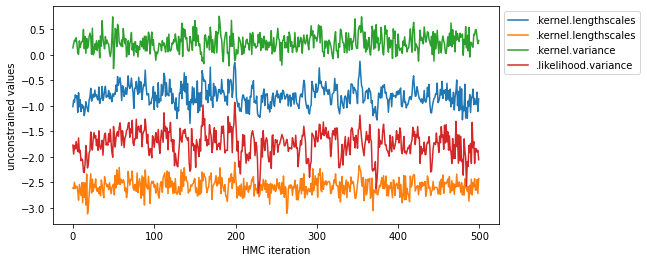

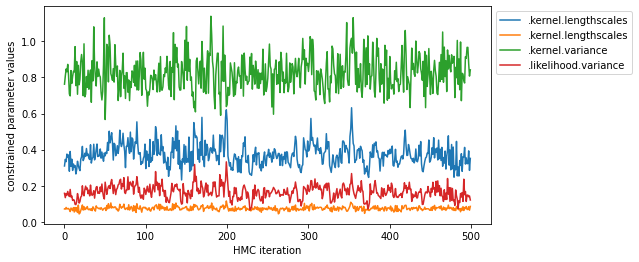

In [24]:
def plot_samples(samples, parameters, y_axis_label):
    plt.figure(figsize=(8, 4))
    for val, param in zip(samples, parameters):
        plt.plot(tf.squeeze(val), label=param_to_name[param])
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.xlabel("HMC iteration")
    plt.ylabel(y_axis_label)


plot_samples(samples, model.trainable_parameters, "unconstrained values")
plot_samples(parameter_samples, model.trainable_parameters, "constrained parameter values")

In [32]:
model.trainable_parameters

(<Parameter: name=softplus, dtype=float64, shape=[2], fn="softplus", numpy=array([0.31056523, 0.07332161])>,
 <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=0.6885158760820851>,
 <Parameter: name=chain_of_shift_of_softplus, dtype=float64, shape=[], fn="chain_of_shift_of_softplus", numpy=0.09044566528043779>)

In [48]:
parameter_samples
parameters = ['kernel_lengthscales','kernel_variance','likelihood_variance']
samples_list = []
for param_sample,param_name in zip(parameter_samples,parameters):
    samples_list.append([param_name,param_sample.numpy()])
samples_array = np.array(samples_list,dtype=object)
np.save('/data/notebooks/jupyterlab-biascorrlab/data/AP_Lima_GP_samples.npy',samples_array)

[<tf.Tensor: shape=(500, 2), dtype=float64, numpy=
 array([[0.30915583, 0.07096583],
        [0.34586482, 0.06994631],
        [0.3331714 , 0.07910193],
        [0.37513855, 0.07032081],
        [0.35901276, 0.07315406],
        [0.37045312, 0.07348256],
        [0.28018916, 0.06686968],
        [0.38973237, 0.05637858],
        [0.30773139, 0.0759837 ],
        [0.34686531, 0.06858459],
        [0.28457924, 0.06164298],
        [0.32026964, 0.07835199],
        [0.30181876, 0.05368762],
        [0.31138726, 0.07879126],
        [0.26508132, 0.05952334],
        [0.2894287 , 0.07813721],
        [0.33536169, 0.05134301],
        [0.31224474, 0.09240034],
        [0.2951673 , 0.04335458],
        [0.28343842, 0.04808393],
        [0.34647326, 0.0622947 ],
        [0.36048059, 0.07591263],
        [0.41780411, 0.09285182],
        [0.33911532, 0.0645984 ],
        [0.35138287, 0.08378818],
        [0.37972605, 0.066772  ],
        [0.36220465, 0.0762352 ],
        [0.40617475, 0.07208299

In [ ]:
samples_array = np.array(list(samples.items()),dtype=object)
np.save('/data/notebooks/jupyterlab-biascorrlab/data/AP_Lima_MCMC_samples.npy',samples_array)

In [49]:
parameter_samples[2].numpy().mean()

0.16552231050086377

In [ ]:
samples_array = np.array(list(samples.items()),dtype=object)

In [44]:
samples[2].numpy().mean()

-1.7412327985440115

In [43]:
samples[1].numpy().mean()

0.24101976948571563

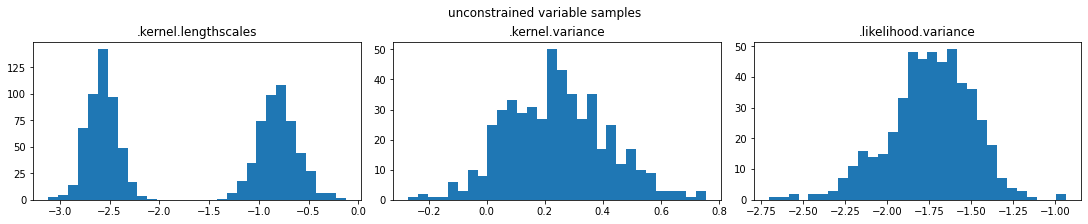

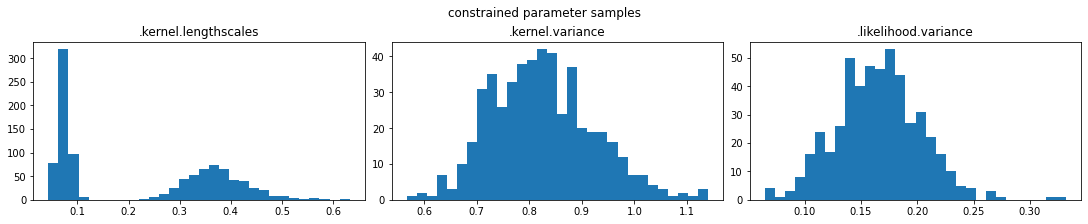

In [27]:
def marginal_samples(samples, parameters, y_axis_label):
    fig, axes = plt.subplots(1, len(param_to_name), figsize=(15, 3), constrained_layout=True)
    for ax, val, param in zip(axes, samples, parameters):
        ax.hist(np.stack(val).flatten(), bins=30)
        ax.set_title(param_to_name[param])
    fig.suptitle(y_axis_label)
    plt.show()


marginal_samples(samples, model.trainable_parameters, "unconstrained variable samples")
marginal_samples(parameter_samples, model.trainable_parameters, "constrained parameter samples")

<Figure size 864x432 with 0 Axes>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-1.01535269, -2.60986411])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.13487896822976142>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.7683842874007651>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.88171618, -2.74456984])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.35681157232251093>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.9215869285017306>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.61841154, -2.50862444])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.35575913550690247>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.5352470890737835>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.89728219, -2.5079106 ])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.29106437706762206>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.775713495513617>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.77394007, -2.70065116])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-0.042900698342788826>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.4206466973995036>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-1.07057897, -2.59248342])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.08486111447522497>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.8122274317794131>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.72694768, -2.40865469])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.07060187607859528>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.3235761610790755>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.97868516, -2.47326512])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.3348091960969122>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.6299902225851752>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.42826649, -2.46884126])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-0.05285959953259736>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-0.9841455836502676>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.67734905, -2.52409895])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.7542009151401233>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.7272740107174147>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.2848855 , -2.34920468])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-0.08738820301919278>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.1989248002429624>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.60103502, -2.4348653 ])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.006668695328807192>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.5319584820239736>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-1.05580818, -2.79861767])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.24758928656839213>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.9641759443027615>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.80587715, -2.79115888])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.3731528911577278>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.7833243087727175>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.78048448, -2.42778018])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.33873326500591383>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.6820749155293329>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.73464076, -2.42076723])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.2632847346683198>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.6255371119176805>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.75425514, -2.63042367])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-0.0762454271771853>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.4864169934385305>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.94127579, -2.60327088])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.08926303475362707>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.8761930463588865>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.717295 , -2.4387524])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.052500688114521965>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.6665316191336776>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.84267637, -2.40795958])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.37144928603132943>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.7440070591864303>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.70464185, -2.6231951 ])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.4056411307230351>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.5700448926857982>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.64720862, -2.3519111 ])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.4190323132718955>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.4985662672936308>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-1.12126845, -2.75477147])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.1749172455494383>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-2.295680655871864>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-0.55743676, -2.49040354])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.16347049408657632>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.7061755299608379>

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float64, numpy=array([-1.01006314, -2.57601515])>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-0.009284157774724786>

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-2.3574538960065436>

NameError: name 'X' is not defined

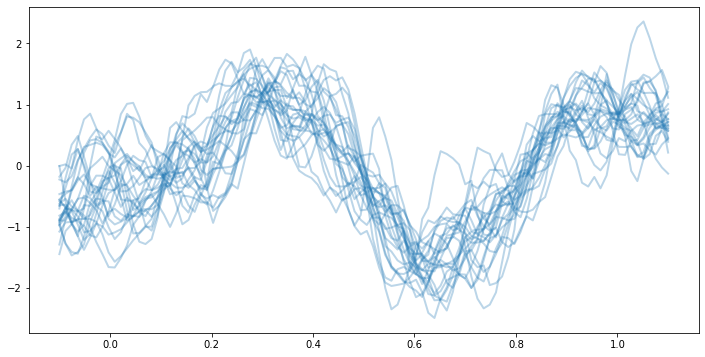

In [26]:
# plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:, None]
plt.figure(figsize=(12, 6))

for i in range(0, num_samples, 20):
    for var, var_samples in zip(hmc_helper.current_state, samples):
        var.assign(var_samples[i])
    f = model.predict_f_samples(xx, 1)
    plt.plot(xx, f[0, :, :], "C0", lw=2, alpha=0.3)

plt.plot(X, Y, "kx", mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(0, 6)
plt.xlabel("$x$")
plt.ylabel("$f|X,Y$")
plt.title("Posterior GP samples")

plt.show()